# Perceptron Neural Network
In this notebook, we will look at the most fundamental type of neural network called Perceptron Neural Network. We will create a neural network for recognising handwritten digits using Python's Keras library and also implement our own neural network from scratch to perform the same task.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

from timeit import default_timer
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
# Loading data and taking a look its format 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

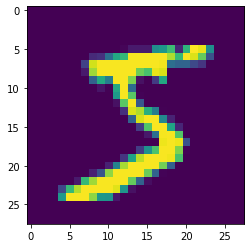

In [3]:
# visualise the data
plt.imshow(X_train[0])
plt.show()

In [4]:
# the images are 28 by 28 pixels of values ranging between 0 and 255
# we first need to reshape the data so that it can be used as an input to our network
pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], pixels))
X_test = X_test.reshape((X_test.shape[0], pixels))

In [5]:
# we will normalise the data 
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# we will convert y_train and y_test to categorical matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# look at the number of output categories
n_categories = y_train.shape[1]
n_categories

10

In [8]:
# building a neural network using keras
def digit_classifier():
    model = Sequential()
    # hidden layers
    model.add(Dense(100, activation='relu', input_shape=(pixels,)))
    model.add(Dense(100, activation='relu'))
    # output layer
    model.add(Dense(n_categories, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# training the model
clf = digit_classifier()
clf.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2449 - accuracy: 0.9281 - val_loss: 0.1294 - val_accuracy: 0.9602
Epoch 2/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.1044 - accuracy: 0.9681 - val_loss: 0.1011 - val_accuracy: 0.9681
Epoch 3/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0741 - accuracy: 0.9772 - val_loss: 0.0880 - val_accuracy: 0.9717
Epoch 4/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0566 - accuracy: 0.9828 - val_loss: 0.0849 - val_accuracy: 0.9726
Epoch 5/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0892 - val_accuracy: 0.9751
Epoch 6/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0380 - accuracy: 0.9874 - val_loss: 0.0886 - val_accuracy: 0.9743
Epoch 7/10
60000/60000 [==============================] - 5s 77us/st

In [10]:
# evaluate the accuracy of the model using testing data
loss, accuracy = clf.evaluate(X_test, y_test)
print('loss of network: {}'.format(loss))
print('accuracy of network on test data: {}'.format(accuracy))

10000/10000 [==============================] - 0s 35us/step
loss of network: 0.08967237305419694
accuracy of network on test data: 0.9768999814987183


In [11]:
# My implementation of a perceptron neural network
class NeuralNetwork:
    
    def __init__(self, n):
        """init method
        :arg n: 1darray or list containing the number of nodes in each layer in the network
        """
        self.layers = len(n)
        self.weights = [np.sqrt(2 / n[l - 1]) * np.random.randn(n[l], n[l - 1]) for l in range(1, len(n))]
        self.biases = [0.01 * np.ones(n[l]) for l in range(1, len(n))]
    
    def train(self, x, y, batch_size=32, epochs=10, eta=0.01):
        """this method trains the neural network using the entire data set.
        :arg x: ndarray of training data
        :arg y: ndarray of expected outputs
        :batchsize: (int) the number of data in each training batch
        :epochs: (int) the number of iterations through the entire training data
        :eta: (float) the learning rate of the network
        """
        for epoch in range(epochs):
            start = default_timer()
            # train by batch
            for b in range(0, len(x), batch_size):
                self.train_mini_batch(x[b:b + batch_size], y[b:b + batch_size], eta)
                
            # calculate the MSE
            mse = np.mean((y - self.predict(x)) ** 2)
            print(f'epoch {epoch + 1} completed -- time taken: {default_timer() - start}s -- MSE: {mse}')
    
    def train_mini_batch(self, x, y, eta):
        """this method trains the network using one batch of the dataset.
        :arg x: ndarray of a batch of training data
        :arg y: ndarray of the expected outputs from the training data
        :arg eta: (float) learning rate of the network
        """
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        
        # forward prop and backprop
        for i in range(len(x)):
            delta_nabla_w, delta_nabla_b = self.backprop(x[i], y[i])
            nabla_w = [w + dw for w, dw in zip(nabla_w, delta_nabla_w)]
            nabla_b = [b + db for b, db in zip(nabla_b, delta_nabla_b)]
        
        self.weights = [w - (eta / len(x)) * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (eta / len(x)) * nb for b, nb in zip(self.biases, nabla_b)]
    
    def backprop(self, x, y):
        """this method performs one iteration of the backpropagation algorithm in the network
        :arg x: ndarray of a batch of training data
        :arg y: ndarray of the expected outputs from the training data
        :return nabla_w: list of ndarrays of partial derivatives of cost with respect to weights
        :return nabla_b: list of ndarrays of partial derivatives of cost with respect to biases
        """
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        
        inputs = x
        zs = []
        activations = [inputs]
        
        # forward prop
        for layer in range(self.layers - 1):
            z = self.bdot(self.weights[layer], inputs) + self.biases[layer]
            a = self.activation_selector(z, layer)
            inputs = a
            
            zs.append(z)
            activations.append(a)
        
        # backprop
        delta = (activations[-1] - y) * self.sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.outer(delta, activations[-2])
        
        # calculate delta for hidden layers
        for l in range(2, self.layers):
            delta = self.bdot(self.weights[-l + 1].T, delta) * self.relu_prime(zs[-l])
            nabla_b[-l] = delta
            nabla_w[-l] = np.outer(delta, activations[-l - 1])
        
        return nabla_w, nabla_b
    
    def predict(self, x):
        """this method predicts the outputs of inputs X using forward propagation.
        :arg X: ndarray of dimensions m by n where m is the number of data points and n is the number of features
        :return outputs: ndarray of outputs from the network
        """
        m = x.shape[0] if len(x.shape) > 1 else 1
        n = len(self.biases[-1])
        outputs = np.zeros((m, n))
        
        for i in range(m):
            inputs = x[i]
            
            # forward prop
            for layer in range(self.layers - 1):
                z = self.bdot(self.weights[layer], inputs) + self.biases[layer]
                a = self.activation_selector(z, layer)
                inputs = a
                
            outputs[i] = inputs
            
        return outputs
    
    def evaluate(self, x, y):
        """this method evaluates the accuracy of the outputs from the neural network."""
        yhat = self.predict(x)
        return np.sum(np.argmax(yhat, axis=1) == np.argmax(y, axis=1)) / len(y)
    
    def save(self, path):
        """this method saves self.weights and self.biases to a specified path"""
        with open(path, 'wb') as f:
            np.savez(f, weights=self.weights, biases=self.biases)
    
    def load(self, path):
        """this method loads weights and biases from a specified path"""
        with np.load(path, allow_pickle=True) as data:
            self.weights = data['weights']
            self.biases = data['biases']
        
    def activation_selector(self, z, layer):
        """this method selects the activation function for each layer"""
        return self.sigmoid(z) if layer == self.layers - 2 else self.relu(z)
    
    def bdot(self, x, y):
        """this method defines a broadcasted dot product"""
        return np.sum(x * y, axis=1)
    
    def relu(self, z):
        """this method acts as the relu activation function"""
        return np.maximum(0, z)

    def relu_prime(self, z):
        """this method acts as the derivation of the relu activation function"""
        return np.where(z > 0, 1, 0)
    
    def sigmoid(self, z):
        """this method acts as the sigmoid activation function"""
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_prime(self, z):
        """this method acts as the derivative of the sigmoid activation function"""
        a = self.sigmoid(z)
        return a * (1 - a)

In [12]:
# training the network
n = [pixels, 100, 100, n_categories]
network = NeuralNetwork(n)
network.load('pretrained_weights.npz')
network.train(X_train, y_train, epochs=5)

epoch 1 completed -- time taken: 46.32384939999999s -- MSE: 0.013011332633951728
epoch 2 completed -- time taken: 48.03594459999999s -- MSE: 0.012561733388799597
epoch 3 completed -- time taken: 46.6617773s -- MSE: 0.012156857878502212
epoch 4 completed -- time taken: 44.11159190000001s -- MSE: 0.011790600578383081
epoch 5 completed -- time taken: 43.929603799999995s -- MSE: 0.011455944531394542


In [13]:
print('accuracy on test data: {}'.format(network.evaluate(X_test, y_test)))

accuracy on test data: 0.9345


In [14]:
# save the weights
network.save('pretrained_weights.npz')

In [15]:
# test the save and load methods
untrained_network = NeuralNetwork(n)
print('accuracy on test data: {}'.format(untrained_network.evaluate(X_test, y_test)))

accuracy on test data: 0.0825


In [16]:
untrained_network.load('pretrained_weights.npz')
print('accuracy on test data: {}'.format(untrained_network.evaluate(X_test, y_test)))

accuracy on test data: 0.9345
